# Python Practice 12

This Python Practice will be dedicated to non-linear curve fitting using the `lmfit` library. After installing it, we will do a short introduction to the library and then we will fit a simple function using it.

## Prerequisites

Let's first install the `lmfit` library. You can do this directly from Jupyter Notebook by running the following command:

```
!pip install lmfit
```

In [ ]:
!pip install lmfit

In [22]:
import numpy as np
import lmfit as lm
import matplotlib.pyplot as plt

## Theoretical background

The `lmfit` package provides simple tools to help you build complex fitting models for non-linear least-squares problems and apply these models to real data. The way it works, is that for any data you want to fit, you need to define a model function, which has some free parameters to be optimized. The `lmfit` library will then use the Levenberg-Marquardt algorithm to minimize the residuals between the data and the model. The total fitting error can be expressed in a chi-square statistic:

$$ \chi^2 = \sum_{i=1}^{N} \left( \frac{y_i - f(x_i)}{\sigma_i} \right)^2 $$

where $y_i$ is the data, $f(x_i)$ is the model function, and $\sigma_i$ is the uncertainty in the data. The goal is to minimize this statistic by adjusting the free parameters of the model function.

Therefore, while fitting the data, you need to follow these steps:

1. Define the model function with free parameters.
2. Estimate the uncertainties in the data.
3. Define the residual function.
4. Define the initial guesses for the free parameters.
5. Minimalize the residuals w.r.t. the free parameters.

## Defining the data

For this Python Practice we will generate synthetic data of a simple sinusoidal function with some noise. The function we will use is:

$$ y = 3\sin(5 x + \pi/3)$$

We only assume that we know in advance that the function is a sinusoidal one, but we don't know the amplitude, frequency, and phase. Therefore, our model function will have three free parameters: `a`, `b`, and `c`:

$$ f(x) = a \sin(b x + c) $$

Let's define the data and plot it.

In [156]:
def target_function(x):
    return 3*np.sin(5 * x + np.pi/3) 

def model_function(x, a, b, c):
    return a * np.sin(b * x + c)


In [145]:
# Generate some data
num_points = 100
noise_level = 1.0 # For modeling the experimental noise

x = np.linspace(0, 5, num_points)
data = target_function(x) + np.random.normal(loc=0.0, scale=noise_level, size=x.size)

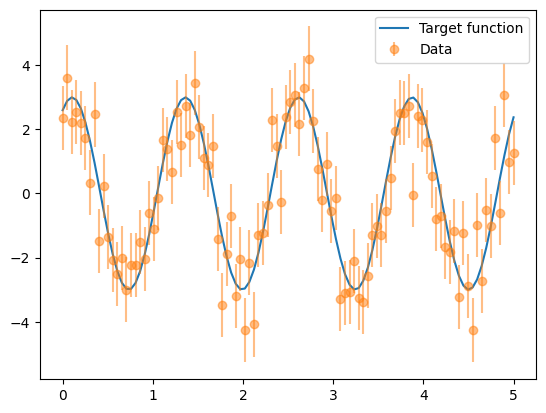

In [149]:
plt.plot(x, target_function(x), label='Target function')
plt.errorbar(x, data, yerr=noise_level, alpha=0.5, fmt='o', label='Data')
plt.legend()
plt.show()

We indeed see some noisy oscillations, but we can still see the sinusoidal behavior. Our goal is to fit this data with the model function and extract the best-fit parameters.

To do this, we need to minimize the residual between the data and the model function. The residual is usually defined as a difference between the data and the model prediction, scaled by the uncertainty in the data:

$$ \text{residual} = \frac{y_i - f(x_i)}{\sigma_i} $$

where $y_i$ is the data, $f(x_i)$ is the model function, and $\sigma_i$ is the uncertainty in the data.

In the case of `lmfit`, it is usually convenient to provide all parameters of the model in a single dictionary. Let's define the model function and the residual function.

In [153]:
def residual(params, x, data, uncertainty):
    a = params['a']
    b = params['b']
    c = params['c']
    model = model_function(x, a, b, c)
    return (data - model) / uncertainty

To create the initial guess of the parameters, we need to use the `lm.create_params()` function, and put the initial guess as arguments. Since we don't know anything the parameters yet, we can but $a=b=1$ for amplitude and frequency, and $c=0$ for the phase.

In [167]:
params = lm.create_params(a=1.0, b=1.0, c=0.0)

Finally, once the params are created, we can use the `lm.minimize()` function to minimize the residuals w.r.t. the free parameters.

In [168]:
out = lm.minimize(residual, params, args=(x, data, noise_level))

In [169]:
out

The chi-square statistic is pretty large, which means that the fit is not optimal. Let's print the best-fit parameters and plot the data and the model function.

In [161]:
a_opt = out.params['a'].value
b_opt = out.params['b'].value
c_opt = out.params['c'].value

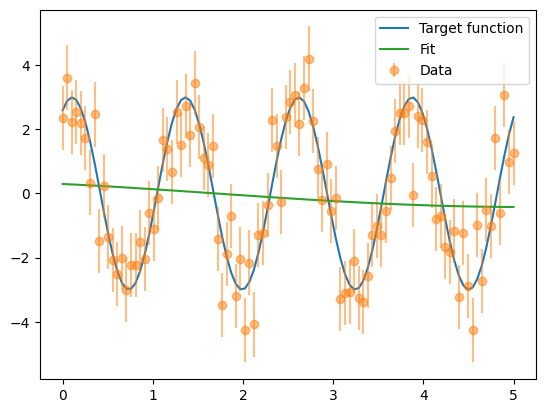

In [162]:
plt.plot(x, target_function(x), label='Target function')
plt.errorbar(x, data, yerr=noise_level, alpha=0.5, fmt='o', label='Data')
plt.plot(x, model_function(x, a=a_opt, b=b_opt, c=c_opt), label='Fit')
plt.legend()
plt.show()

We don't learn any thing... This is because the least-squares algorithm is sensitive to the initial guess of the parameters. Therefore, we need to provide better initial guesses. Let's try to do this.

In [176]:
params = lm.create_params(a=1.0, b=4.5, c=1.0)
out = lm.minimize(residual, params, args=(x, data, noise_level))

In [177]:
out

This time chi-square is much smaller, which means that the fit is better. Let's print the best-fit parameters and plot the data and the model function.

In [174]:
a_opt = out.params['a'].value
b_opt = out.params['b'].value
c_opt = out.params['c'].value

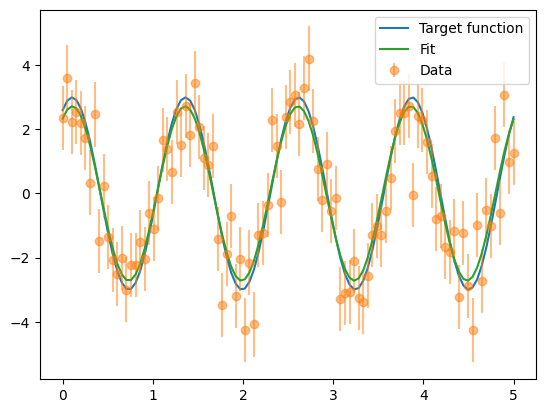

In [175]:
plt.plot(x, target_function(x), label='Target function')
plt.errorbar(x, data, yerr=noise_level, alpha=0.5, fmt='o', label='Data')
plt.plot(x, model_function(x, a=a_opt, b=b_opt, c=c_opt), label='Fit')
plt.legend()
plt.show()

This time our fit is perfectly fine. We can see that the best-fit parameters are very close to the true values.